In [1]:
'''
DOMINANT COLOUR EXTRACTION
Image Segmentation :
- partitions the image into regions having similar visual appearnce correspon
- we try to extract the most dominant 'K' colors using K-Means Clustering
- With K-Means each color pixel will be reassigned to closest of the the k-Colors leading to segmentation
'''

"\nDOMINANT COLOUR EXTRACTION\nImage Segmentation :\n- partitions the image into regions having similar visual appearnce correspon\n- we try to extract the most dominant 'K' colors using K-Means Clustering\n- With K-Means each color pixel will be reassigned to closest of the the k-Colors leading to segmentation\n"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
plt.style.use('dark_background')

In [8]:
def DominantColorExtraction(image_name,n_dominant_colors):
    image_temp = cv2.imread(image_name)
    # RGB and BGR -- Area occupied by each color in decreasing order
    #by default format == BGR.. then we convert to RGB format
    image = cv2.cvtColor(image_temp,cv2.COLOR_BGR2RGB)
    plt.title('{} BGR'.format(image_name))
    plt.imshow(image_temp)
    plt.show()
    plt.title('{} RGB'.format(image_name))
    plt.imshow(image)
    plt.show()
    #image_temp.shape
    #image.shape
    #Flatten each channel(red,green,blue) of the image in a linear array
    all_pixels=image.reshape((image.shape[0]*image.shape[1],3))
    #plt.imshow(all_pixels)
    
    model,centers,colors=KMEansClusteringModel(n_dominant_colors,all_pixels)
    new_image = np.zeros(all_pixels.shape,dtype='uint8')
    for index in range(all_pixels.shape[0]):
        new_image[index] = colors[model.labels_[index]]
    new_image=new_image.reshape(image.shape)
    plt.title('Before Dominant Color Extraction')
    plt.imshow(image)
    plt.show()
    plt.title('After Dominant Color Extraction')
    plt.imshow(new_image)
    plt.show()

In [9]:
def KMEansClusteringModel(n_dominant_colors,all_pixels):
    model = KMeans(n_clusters=n_dominant_colors)
    model.fit(all_pixels)
    centers = np.array(model.cluster_centers_,dtype='uint8')
    #print(centers)
    colors = visualize_dominant_colors(centers,n_dominant_colors)
    return model,centers,colors

In [10]:
def visualize_dominant_colors(centers,n_dominant_colors):
    #visualize plot for each colours
    label=1
    colors=[]
    for center_color in centers:
        #no. of rows and column and number for figure label
        plt.subplot(1,n_dominant_colors,label)
        plt.axis('off')
        plt.title(label)
        label+=1
        colors.append(center_color)
        #assign colours for each value
        a = np.zeros((100,100,3),dtype='uint8')
        a[:,:,:] = center_color
        plt.imshow(a)
    plt.show()
    
    return colors
    

In [15]:
def main():
    n_dominant_colors = 2
    #image_name='elephant.jpg'
    image_name='Naruto1.jpeg'
    DominantColorExtraction(image_name,n_dominant_colors)

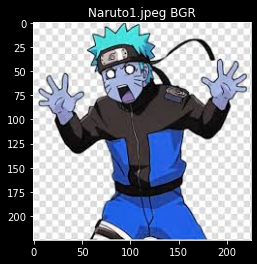

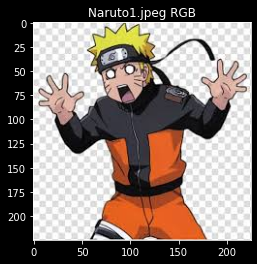

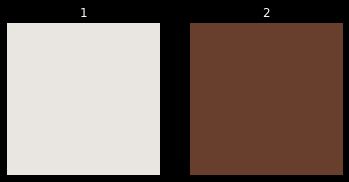

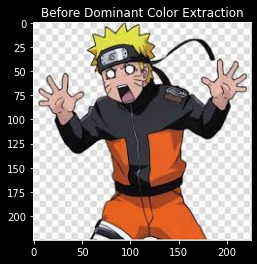

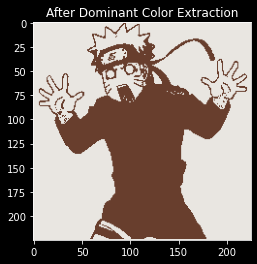

In [16]:
if __name__=="__main__":
    main()

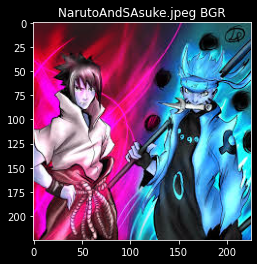

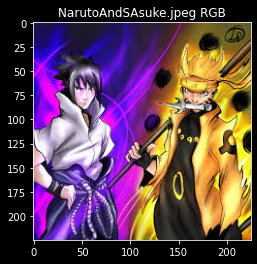

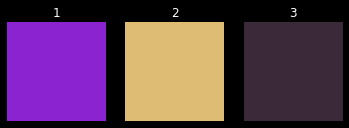

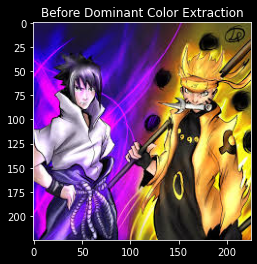

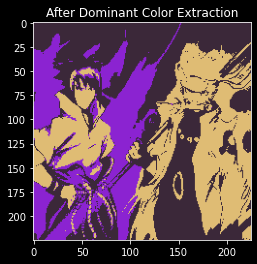

In [20]:
n_dominant_colors = 3
image_name='NarutoAndSAsuke.jpeg'
DominantColorExtraction(image_name,n_dominant_colors)

In [ ]:
#image segmentation
